<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristian Oyarzo M.
- Nombre de alumno 2: Sebastián Quenti A.


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/sebaquenti/Repositorio-MDS7202)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

Desarrollo:

1. 

In [2]:
# Información sobre el dataset (tipos de datos, valores nulos, etc.)
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float6

In [3]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
df.describe()


Estadísticas descriptivas del dataset:


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


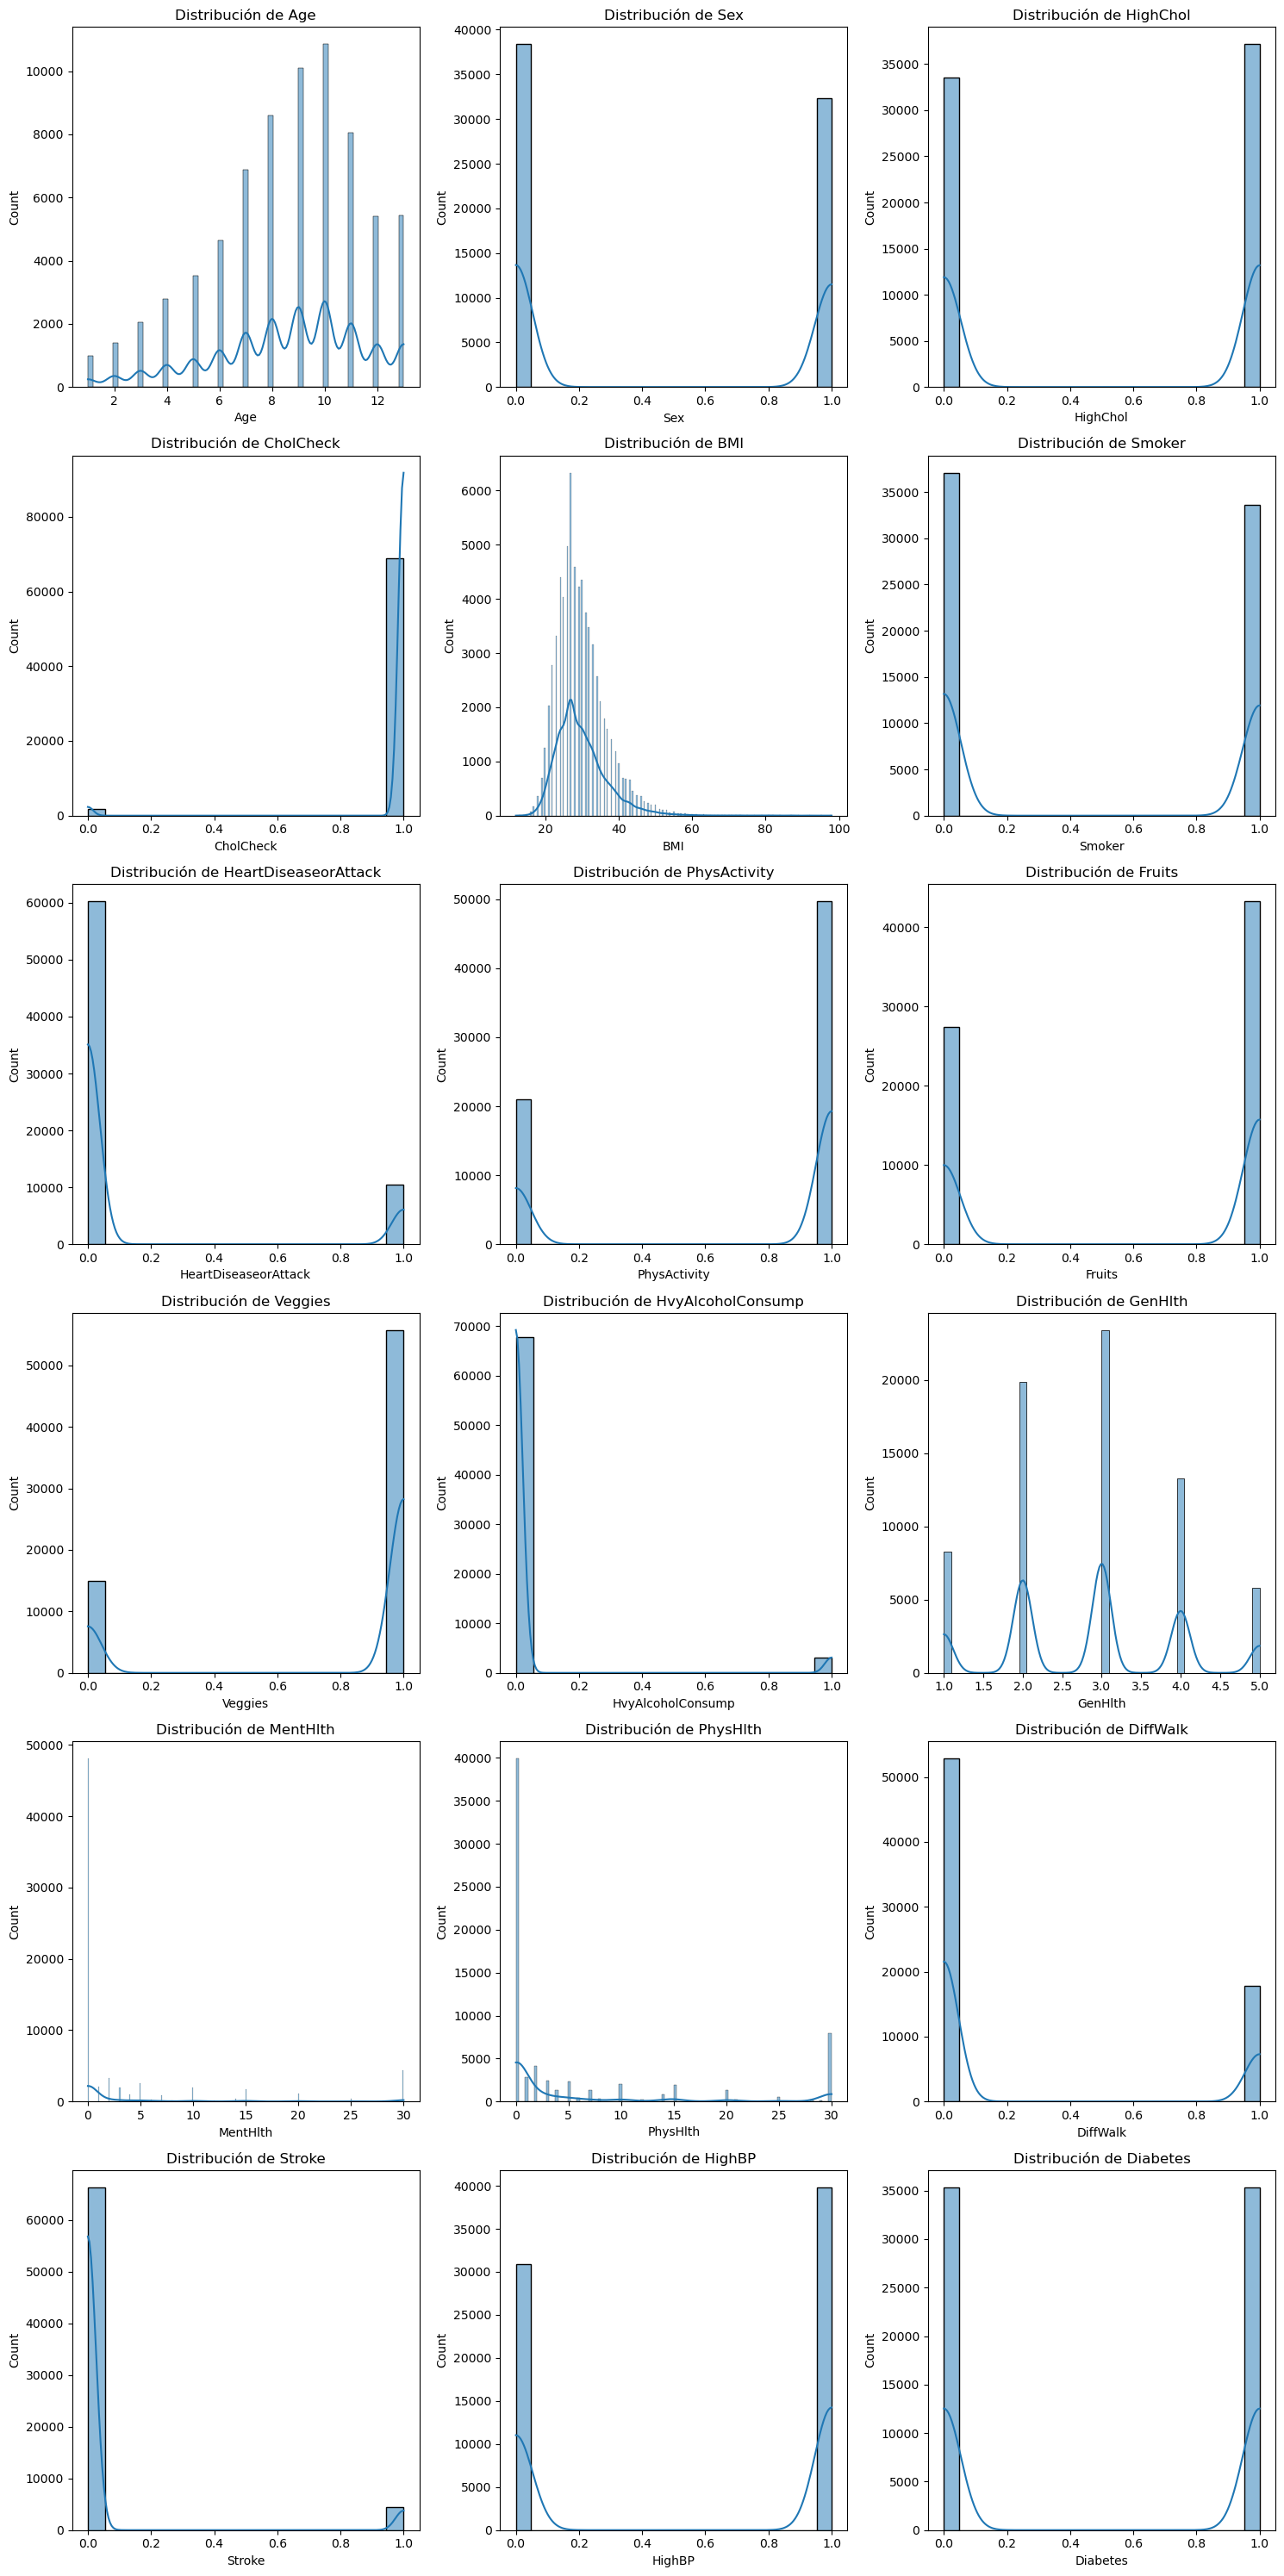

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar los warnings
warnings.filterwarnings("ignore")


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Ajuste de filas y columnas para graficar
num_columns = len(numeric_columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calcula el número de filas necesarias

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

Se va a utilizar MinMaxScaler para escalar solo las variables numéricas no binarias, transformándolas a un rango entre 0 y 1. Esto permite normalizar las características con diferentes rangos de valores, ayudando a evitar que variables con magnitudes mayores dominen el proceso de aprendizaje del modelo.

In [5]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y el objetivo (y)
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (47128, 17)
Tamaño del conjunto de prueba: (23564, 17)


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

binary_columns = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack',
                  'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk',
                  'Stroke', 'HighBP', 'Diabetes']
columns_to_scale = [col for col in df.columns if col not in binary_columns and col != 'Diabetes']

# Crear el ColumnTransformer con MinMaxScaler en las columnas seleccionadas
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), columns_to_scale)
    ],
    remainder='passthrough',  # Dejar las columnas binarias sin cambios
    verbose_feature_names_out=False
).set_output(transform='pandas')


In [7]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Crear el pipeline con el preprocesamiento y el modelo XGBoost
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb_model', XGBClassifier())
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Reportar el desempeño del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     11782
         1.0       0.73      0.79      0.76     11782

    accuracy                           0.75     23564
   macro avg       0.75      0.75      0.75     23564
weighted avg       0.75      0.75      0.75     23564



El modelo XGBoost logró una precisión del 75%, con un desempeño balanceado en ambas clases. Para la clase 0 (no diabetes), obtuvo una precisión de 77% y un recall de 71%, mientras que para la clase 1 (diabetes) alcanzó una precisión de 73% y un recall de 79%. Los f1-scores (74% y 76%) indican un buen balance general, con un ligero enfoque hacia la detección de casos de diabetes, siendo estos resultados sólidos y adecuados para una primera versión del modelo.

2. 

* Sí, el modelo muestra un desempeño aceptable, con una precisión general del 75% y f1-scores equilibrados para ambas clases (diabetes y no diabetes). Aunque no es perfecto, el modelo tiene un buen balance entre precisión y recall, especialmente en la identificación de casos de diabetes (clase 1), lo que sugiere que podría ser útil en un entorno clínico.

* Las métricas de precisión y recall miden la capacidad del modelo para evitar falsos positivos y falsos negativos, respectivamente, mientras que el f1-score proporciona un equilibrio entre ambas. En conjunto, estas métricas ayudan a evaluar si el modelo predice con precisión la clase de cada caso (diabetes o no) y cómo de bien logra detectar correctamente casos positivos y negativos.

* No completamente. Las métricas de rendimiento como precisión y f1-score solo indican el desempeño global del modelo en la predicción de las clases, pero no revelan si las características seleccionadas son las óptimas. Para evaluar la importancia y selección de características, se necesitarían análisis adicionales, como la importancia de características o técnicas de selección de variables.







## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

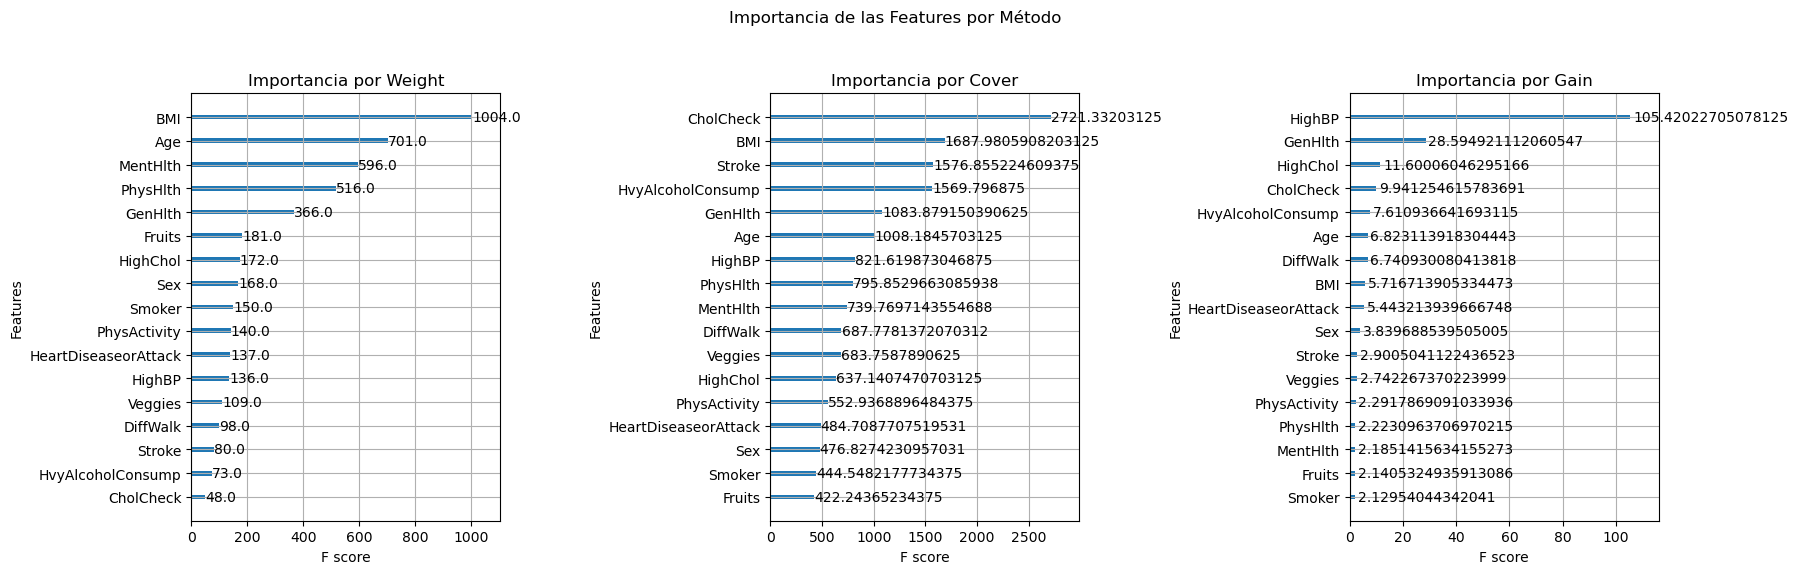

In [8]:
# 1
from xgboost import plot_importance

# Acceder al modelo XGBoost dentro del pipeline
xgb_model = pipeline.named_steps['xgb_model']

# Configuración de la figura para mostrar las tres importancias
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Importancia de las Features por Método')

# Importancia por 'weight' (frecuencia de uso de cada feature)
plot_importance(xgb_model, importance_type='weight', ax=axs[0])
axs[0].set_title('Importancia por Weight')

# Importancia por 'cover' (cobertura promedio de cada feature en las ramas donde se usa)
plot_importance(xgb_model, importance_type='cover', ax=axs[1])
axs[1].set_title('Importancia por Cover')

# Importancia por 'gain' (ganancia promedio de cada feature)
plot_importance(xgb_model, importance_type='gain', ax=axs[2])
axs[2].set_title('Importancia por Gain')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

2. Los resultados obtenidos con los métodos weight, cover, y gain muestran algunas similitudes, pero también diferencias notables. Estas diferencias son esperadas debido a la manera en que cada método mide la importancia de las características.

    Weight: En este gráfico, BMI y Age son las características más frecuentemente seleccionadas en los nodos de decisión. Esto indica que el modelo utiliza estas características con frecuencia para hacer divisiones en los árboles, pero no necesariamente significa que contribuyan de manera significativa a mejorar la precisión.

    Cover: Aquí, CholCheck, BMI, y Stroke tienen los valores más altos, lo que implica que estas características afectan a un gran número de ejemplos en las divisiones. La cobertura considera cuántos datos atraviesan cada nodo que utiliza una característica específica, lo que refleja la relevancia en términos de cantidad de datos afectados.

    Gain: En este caso, HighBP y GenHlth son las características más importantes, ya que aportan la mayor mejora en precisión cuando se utilizan. Gain mide la contribución real al rendimiento del modelo, proporcionando una medida directa de cuánta información aporta cada característica.

    Las diferencias en los resultados entre los métodos se deben a cómo cada uno mide la importancia:

    Weight es una medida de frecuencia y no refleja directamente el impacto en la precisión.
    Cover muestra qué características afectan a una mayor cantidad de datos, pero no necesariamente mejoran el modelo.
    Gain es generalmente considerado el más representativo en términos de importancia real, ya que muestra cuánto mejora cada característica el modelo en cada división.








3. Las importancias de características en XGBoost son útiles para entender, en promedio, qué variables son más relevantes para el modelo, pero no son suficientes para una interpretabilidad completa. Este método presenta limitaciones, ya que solo brinda una visión global sin detallar cómo cada característica influye en predicciones individuales y no capta relaciones complejas entre variables. Además, la importancia de las características puede variar según los parámetros del modelo, lo que hace que no sea totalmente robusto. Para interpretaciones locales y detalladas, métodos como SHAP o LIME son más adecuados.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [9]:
# 1
from sklearn.metrics import accuracy_score

X_test_transformed = preprocessor.transform(X_test)

# Obtener el modelo XGBoost entrenado del pipeline
xgb_model = pipeline.named_steps['xgb_model']

# Calcular la precisión original en el conjunto de prueba
y_pred_original = xgb_model.predict(X_test_transformed)
accuracy_original = accuracy_score(y_test, y_pred_original)

feature_names = xgb_model.get_booster().feature_names
feature_importance_permutation = {}

# Evaluar la importancia de cada característica mediante permutación
for i, feature in enumerate(feature_names):
    X_test_permuted = X_test_transformed.copy()
    
    X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature].values)
    
    y_pred_permuted = xgb_model.predict(X_test_permuted)
    accuracy_permuted = accuracy_score(y_test, y_pred_permuted)
    
    feature_importance_permutation[feature] = accuracy_original - accuracy_permuted

# Ordenar las características según su importancia
feature_importance_permutation = dict(sorted(feature_importance_permutation.items(), key=lambda item: item[1], reverse=True))

# Mostrar la importancia de las características
print("Importancia de las características mediante permutación:")
for feature, importance in feature_importance_permutation.items():
    print(f"{feature}: {importance:.4f}")


Importancia de las características mediante permutación:
GenHlth: 0.0598
Age: 0.0324
BMI: 0.0297
HighBP: 0.0190
HighChol: 0.0116
DiffWalk: 0.0042
CholCheck: 0.0037
HeartDiseaseorAttack: 0.0034
PhysHlth: 0.0027
HvyAlcoholConsump: 0.0017
Stroke: 0.0016
Smoker: 0.0008
MentHlth: 0.0007
Sex: 0.0007
PhysActivity: 0.0006
Veggies: 0.0005
Fruits: -0.0004


In [10]:
# 2

n_repeats = 30

X_test_transformed = preprocessor.transform(X_test)

xgb_model = pipeline.named_steps['xgb_model']

y_pred_original = xgb_model.predict(X_test_transformed)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Obtener los nombres de las características en el orden correspondiente
feature_names = xgb_model.get_booster().feature_names
feature_importance_results = {feature: [] for feature in feature_names}

# Realizar el proceso de permutación 30 veces
for _ in range(n_repeats):
    for feature in feature_names:
        X_test_permuted = X_test_transformed.copy()
        
        X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature].values)
        
        y_pred_permuted = xgb_model.predict(X_test_permuted)
        accuracy_permuted = accuracy_score(y_test, y_pred_permuted)
        
        importance = accuracy_original - accuracy_permuted
        feature_importance_results[feature].append(importance)

feature_importance_summary = {
    feature: {
        'mean_importance': np.mean(importances),
        'std_importance': np.std(importances)
    }
    for feature, importances in feature_importance_results.items()
}

importance_df = pd.DataFrame(feature_importance_summary).T
importance_df = importance_df.sort_values(by='mean_importance', ascending=False)

print("Importancia de las características mediante permutación (promedio y desviación estándar):")
print(importance_df)


Importancia de las características mediante permutación (promedio y desviación estándar):
                      mean_importance  std_importance
GenHlth                      0.057124        0.002168
BMI                          0.032668        0.001775
Age                          0.029041        0.001817
HighBP                       0.017319        0.001388
HighChol                     0.012184        0.001122
HeartDiseaseorAttack         0.004012        0.000657
CholCheck                    0.003852        0.000647
DiffWalk                     0.003367        0.000832
HvyAlcoholConsump            0.003031        0.000538
MentHlth                     0.001808        0.000770
PhysHlth                     0.001273        0.000837
Smoker                       0.001013        0.000534
Stroke                       0.000997        0.000445
PhysActivity                 0.000566        0.000539
Sex                          0.000455        0.000605
Fruits                      -0.000301        0

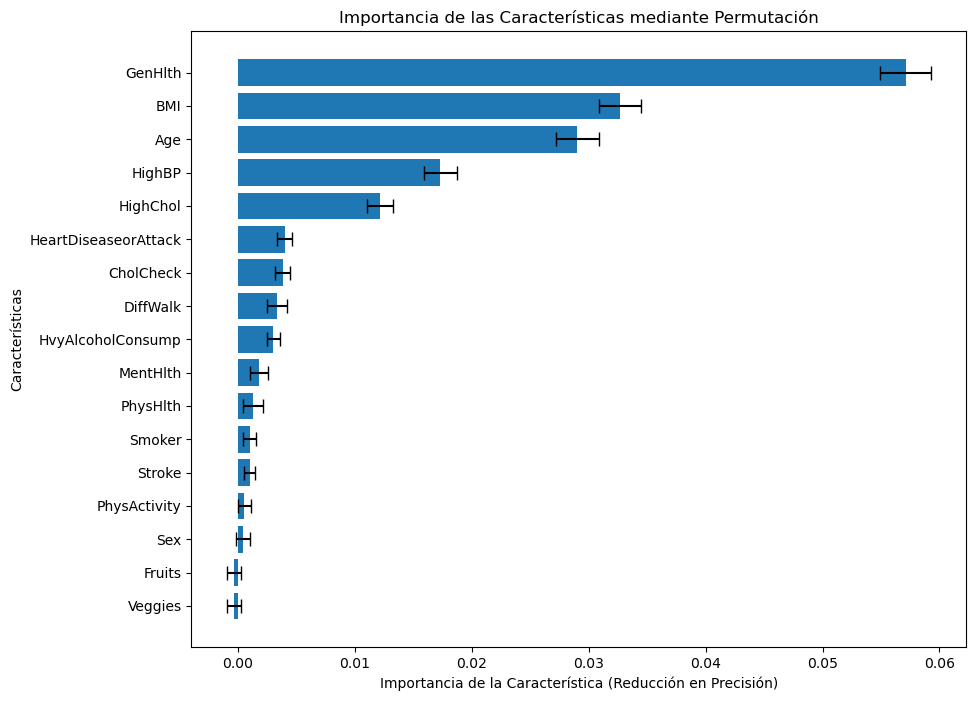

In [21]:
# 3
importance_df = importance_df.sort_values(by='mean_importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_df.index, importance_df['mean_importance'], xerr=importance_df['std_importance'], capsize=5)
plt.xlabel("Importancia de la Característica (Reducción en Precisión)")
plt.ylabel("Características")
plt.title("Importancia de las Características mediante Permutación")
plt.show()

4. 
* La importancia de las características se mide mediante el método de permutación, que calcula cuánto se reduce la precisión del modelo cuando los valores de una característica específica son permutados aleatoriamente. Al permutar los valores de una característica y mantener las demás constantes, observamos el impacto directo de esa característica en el rendimiento del modelo.
* Las cinco características con mayor impacto en el modelo fueron HighBP, GenHlth, Age, BMI, y PhysHlth, y tienen sentido en el contexto de la diabetes. HighBP (hipertensión) es relevante porque la presión arterial alta está estrechamente relacionada con la diabetes y sus complicaciones. GenHlth (salud general) refleja el estado de salud general del paciente, un factor clave en enfermedades crónicas como la diabetes. La variable Age (edad) es significativa porque la diabetes es más prevalente en personas mayores, haciendo de la edad un predictor importante del riesgo. El BMI (índice de masa corporal) también es relevante, ya que un BMI alto se asocia con el riesgo de diabetes tipo 2 debido al impacto del sobrepeso. Finalmente, PhysHlth (días con problemas de salud física) muestra el impacto de problemas de salud física, comunes en personas con diabetes, especialmente si no está bien controlada. 
* Comparado con el método de importancia de características de XGBoost, el método de permutación proporciona una visión más precisa del impacto de cada característica en el rendimiento del modelo. En el método anterior, las importancias dependían de medidas globales (como gain y weight), que no siempre reflejan el impacto real de cada característica en el modelo final. El método de permutación es más robusto, ya que mide el cambio directo en la precisión, lo cual da una interpretación más confiable y consistente sobre qué características son realmente importantes para el modelo.
* Tiene 3 ventajas, las cuales son:
    - Fácil interpretación: El método de permutación permite medir directamente el impacto de cada característica en el desempeño del modelo, lo que facilita su interpretación.
    - Alta comprensión de interpretabilidad global: Ofrece una visión general clara de la importancia de cada característica, permitiendo una interpretación comparativa.
    - Comparable entre modelos: Este método puede aplicarse a diferentes modelos sin necesidad de re-entrenarlos, lo que facilita su uso en distintos enfoques.
    
    Y también 3 desventajas:
    - Dependencia del error del modelo: El método está enlazado al error o precisión del modelo, por lo que cualquier imprecisión afectará las medidas de importancia.
    - Requiere la etiqueta real (gold label): Necesita acceso a las etiquetas verdaderas para calcular el impacto en la precisión, lo cual puede ser una limitación en ciertos casos.
    - Sesgo en características correlacionadas: Si las características están correlacionadas, el método puede generar combinaciones poco realistas al permutarlas. Además, añadir una característica correlacionada puede reducir la importancia de otra asociada, ya que la importancia se divide entre ambas.







## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [12]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [26]:
import shap

# Crear el objeto explainer de SHAP para el modelo XGBoost
explainer = shap.Explainer(pipeline.named_steps['xgb_model'], preprocessor.transform(X_test))

# Calcular los SHAP values en el conjunto de prueba
shap_values = explainer(preprocessor.transform(X_test))

# Mostrar los SHAP
shap_values

100%|===================| 23516/23564 [01:08<00:00]        

.values =
array([[ 2.74349906e-01, -5.62247979e-01,  1.21016615e+00, ...,
        -4.41480720e-02, -1.02711414e-02, -3.33138565e-01],
       [ 6.53025438e-01,  6.29878979e-01,  2.15921250e-01, ...,
         1.57319994e-01, -4.66673846e-03, -3.19242972e-01],
       [ 1.85745721e-02, -2.15128096e-01, -4.48811598e-01, ...,
        -8.43040075e-02, -5.09105980e-03,  4.01299691e-01],
       ...,
       [ 2.23172889e-01,  5.07566907e-01,  8.24322763e-01, ...,
        -3.41830053e-02,  1.23987619e-04,  4.73188546e-01],
       [ 4.74125342e-01,  4.92720826e-02, -3.30002683e-01, ...,
        -7.28014673e-02, -6.25603032e-03, -2.85632781e-01],
       [ 3.90656084e-01, -4.88687026e-01, -3.91856569e-01, ...,
        -6.70840534e-02, -1.04253829e-02,  4.05628363e-01]])

.base_values =
array([-0.53624253, -0.53624253, -0.53624253, ..., -0.53624253,
       -0.53624253, -0.53624253])

.data =
array([[0.75      , 0.12790698, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [1.      

2. Los resultados entregan el impacto de cada característica en la predicción final, los valores muestran cuánto aporta cada característica al diagnóstico.

3. Es posible atribuir un significado a la positividad o negatividad de cada valor SHAP. Un valor positivo indica que la característica en cuestión aumenta la probabilidad de que el paciente sea diagnosticado con diabetes, contribuyendo a que el modelo se incline hacia esta clase. Por el contrario, un valor negativo indica que la característica reduce la probabilidad de diabetes, alejando la predicción del modelo de esa clase.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

Gráfico de SHAP values para la instancia 1


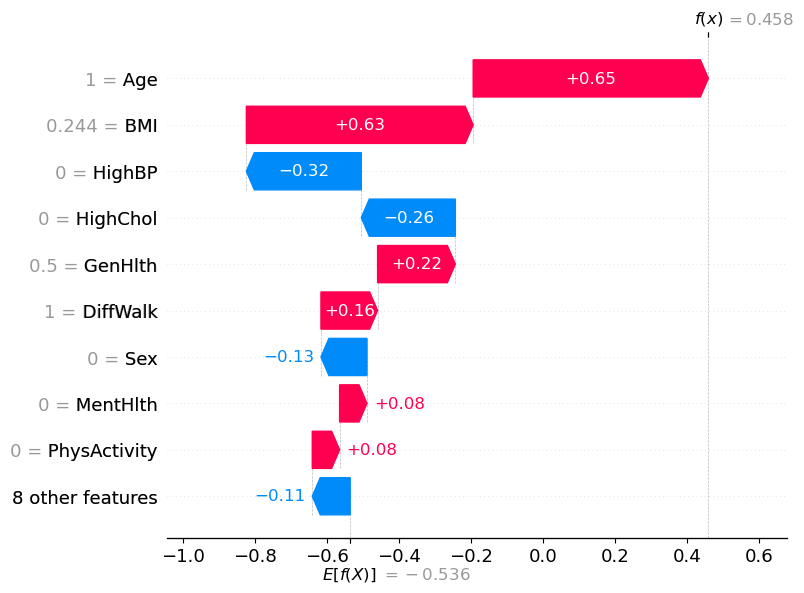

Gráfico de SHAP values para la instancia 9


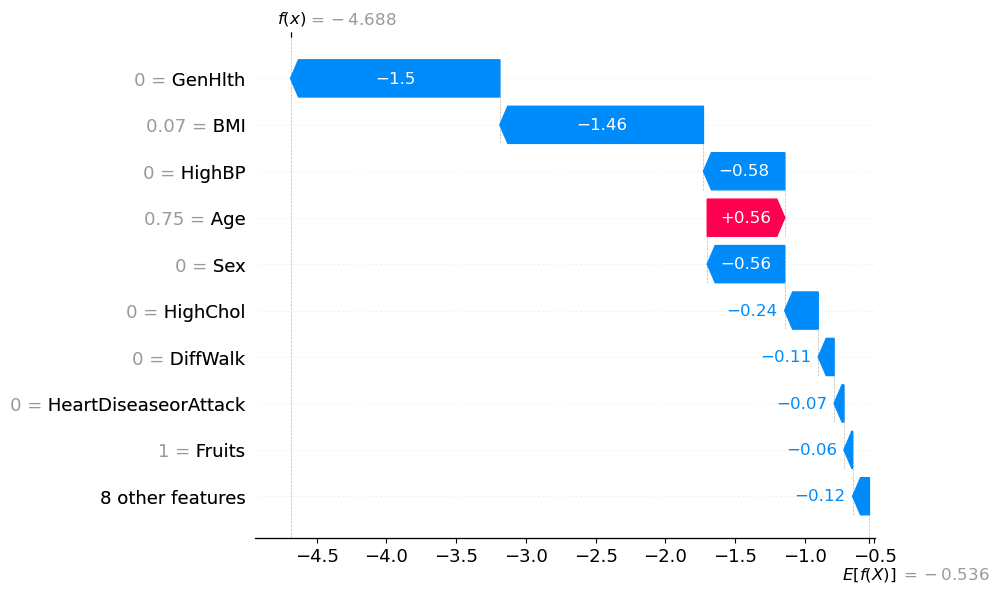

Gráfico de SHAP values para la instancia 150


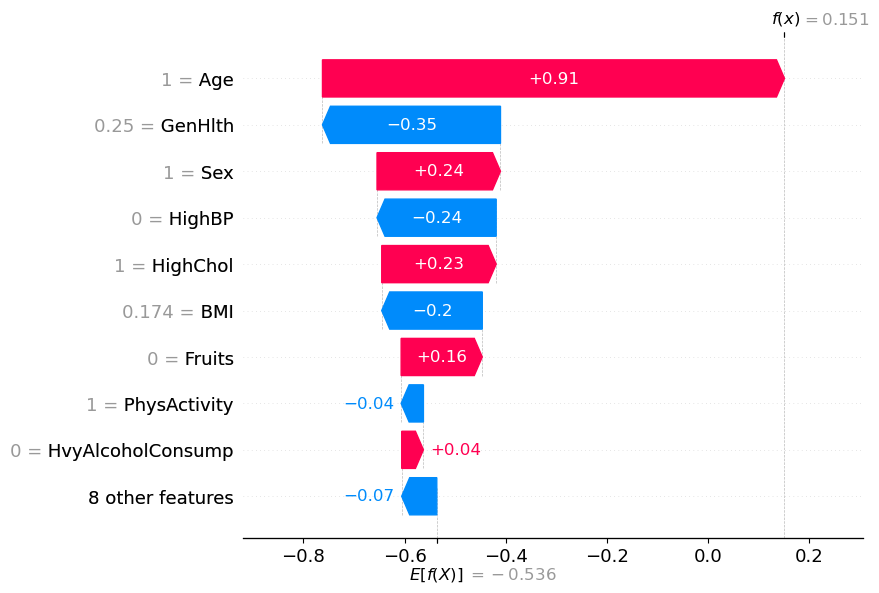

In [27]:
# 1
instances = [1, 9, 150]

# Graficar el aporte local de cada característica en cada instancia seleccionada
for i in instances:
    print(f"Gráfico de SHAP values para la instancia {i}")
    shap.plots.waterfall(shap_values[i])

2. 
    * Variables como Age tienden a aumentar la probabilidad de diabetes (efecto positivo), mientras que variables como GenHlth y HighBP (cuando son bajos) reducen la probabilidad.
    * Sí, en las tres instancias, variables como Age aparecen consistentemente entre las características con efectos significativos. Además, tener buenos valores de GenHlth y HighBP reduce la probabilidad de diabetes en varias instancias. Sin embargo, al considerar todas las variables no pareciera haber un patron claro.

    * No completamente. Aunque ciertas características como Age parecen influir fuertemente en el riesgo de diabetes, los SHAP values son específicos de cada instancia. Por lo tanto, aunque estas tendencias pueden ser comunes, la influencia exacta de cada característica puede variar entre individuos. Para generalizar, sería necesario un análisis más amplio en todo el dataset.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

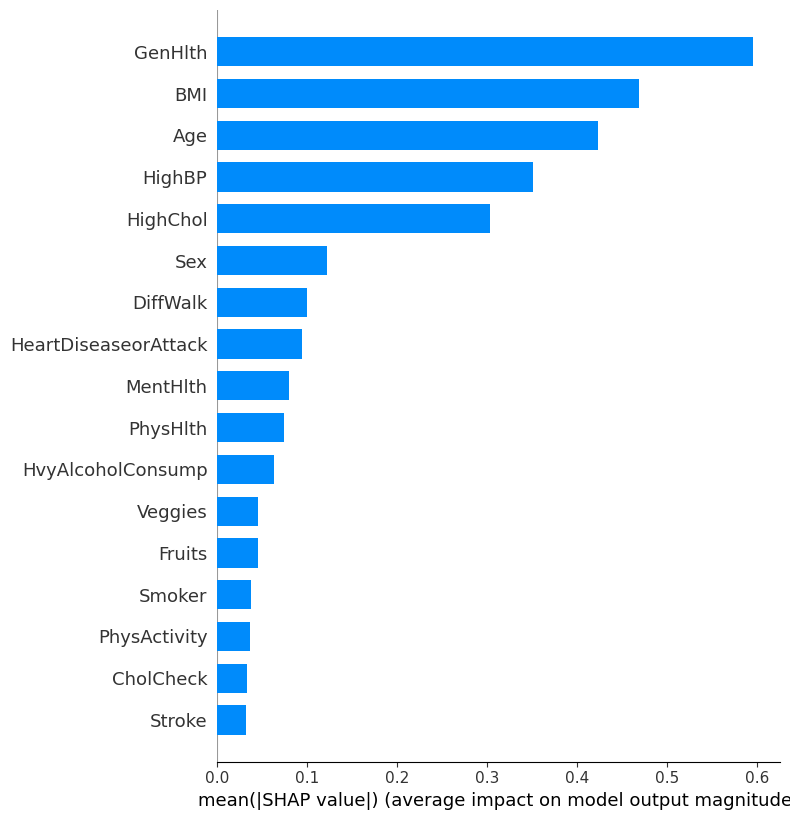

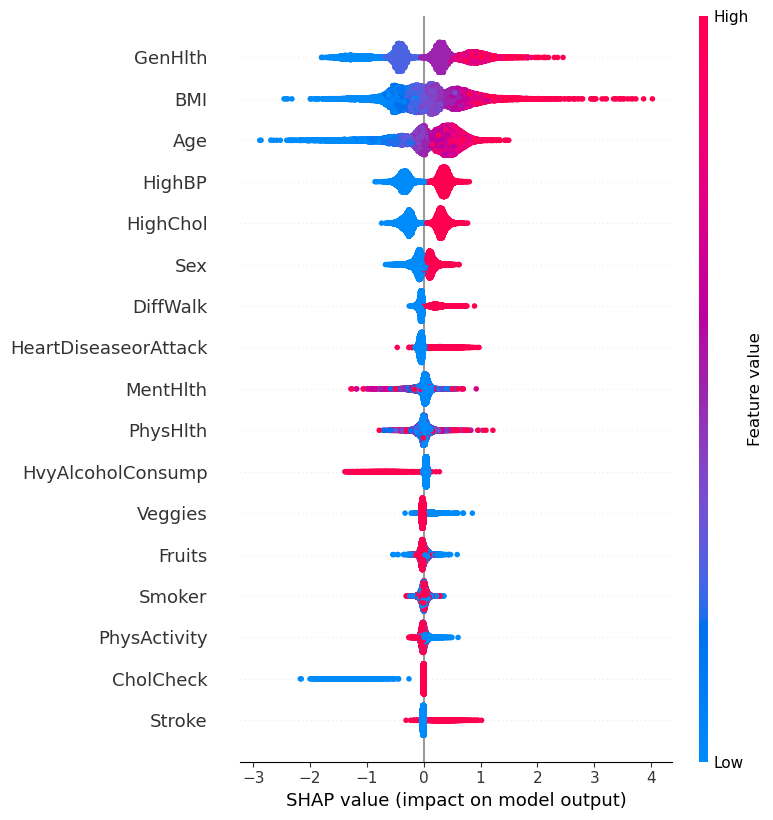

In [28]:
# Visualización de la importancia global de cada característica
shap.summary_plot(shap_values, preprocessor.transform(X_test), plot_type="bar")

# Visualización de un diagrama de dispersión de los SHAP values
shap.summary_plot(shap_values, preprocessor.transform(X_test))

En la visualización global de SHAP, observamos que GenHlth, BMI, Age, y HighBP son las características que más influyen en la predicción del modelo. . Este análisis muestra patrones consistentes en el impacto de estas características en la predicción del modelo.

A nivel de instancia, las conclusiones variaban más en función de los valores específicos de cada paciente, donde características como Age y GenHlth tenían efectos significativos pero podían diferir en magnitud e impacto. A nivel global, aunque Age y GenHlth siguen siendo importantes, el análisis muestra de manera más clara cómo el promedio de los valores SHAP destaca estas características consistentemente. Sin embargo, a nivel de instancia, otros factores específicos del paciente pueden tomar relevancia en ciertos casos, lo que limita la posibilidad de generalizar conclusiones individuales al conjunto completo.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

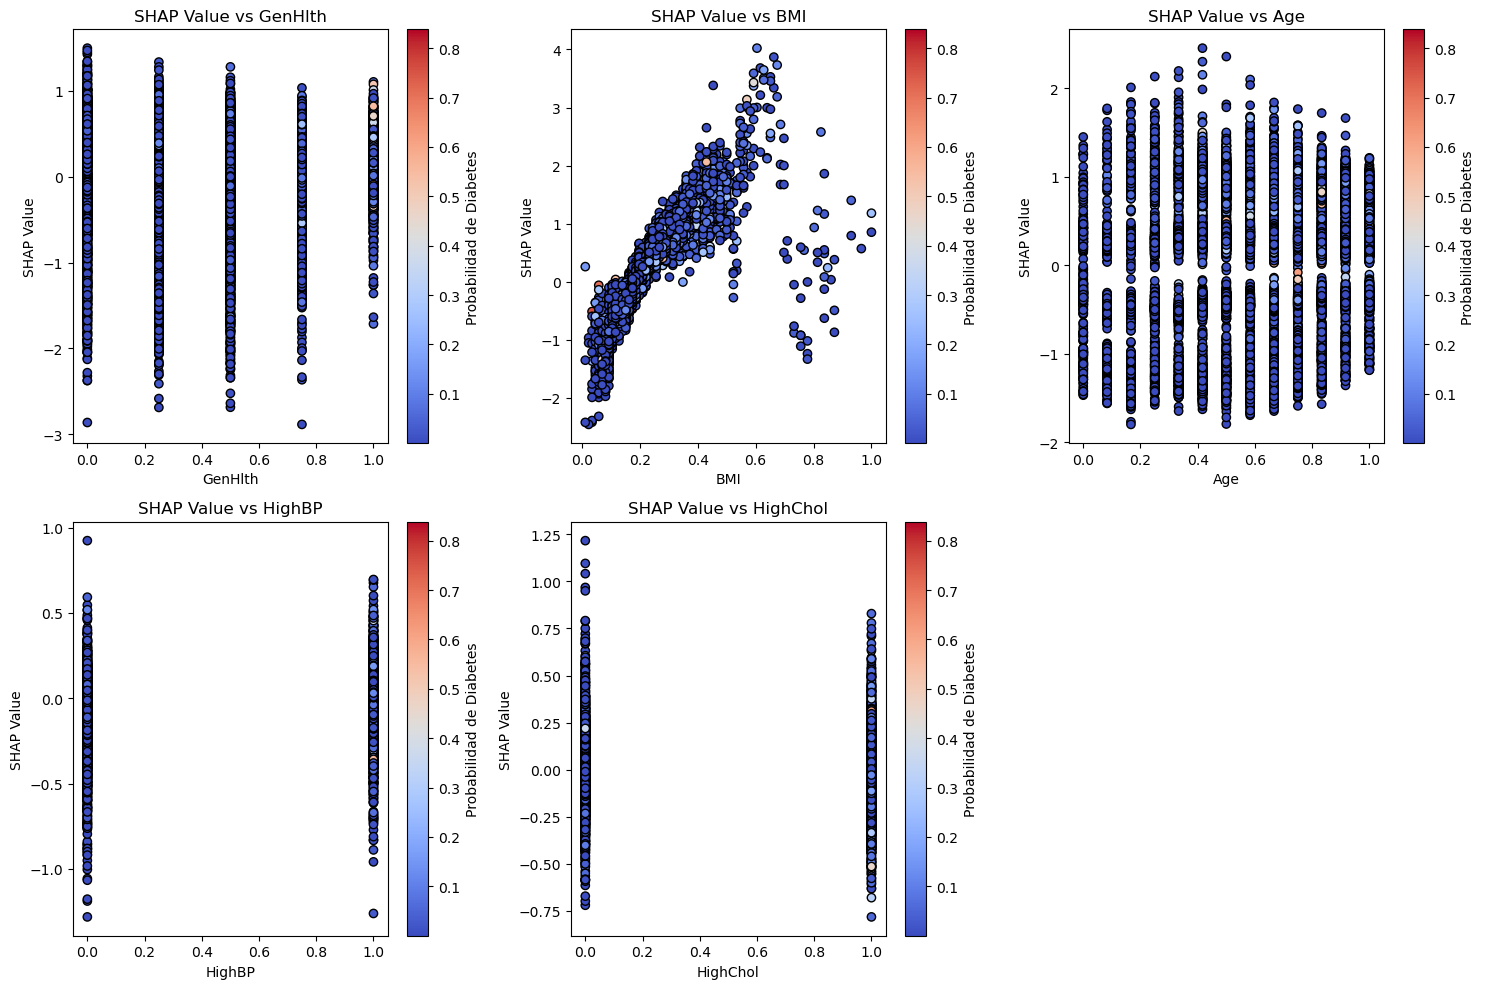

In [29]:
top_features = ["GenHlth", "BMI", "Age", "HighBP", "HighChol"]

# Obtener las probabilidades de diabetes (predicciones del modelo)
probs = pipeline.predict_proba(X_test_transformed)[:, 1]  # Probabilidad de la clase positiva (diabetes)

# Crear scatterplots para cada una de las 5 características principales
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_test_transformed[feature], shap_values[:, i - 1].values, c=probs, cmap='coolwarm', edgecolor='k')
    plt.colorbar(label="Probabilidad de Diabetes")
    plt.xlabel(feature)
    plt.ylabel("SHAP Value")
    plt.title(f"SHAP Value vs {feature}")

plt.tight_layout()
plt.show()

BMI es la única característica en la que se observa un patrón de influencia constante en la probabilidad de diabetes (A medida que el BMI aumenta, los valores SHAP también tienden a ser más altos), mientras que el resto muestra una relación más difusa, sin una tendencia clara en estos gráficos. Esto podría sugerir que el impacto de características como GenHlth, Age, HighBP, y HighChol es más dependiente de interacciones con otras variables, en lugar de tener un efecto directo y consistente. Cabe destacar que GenHlth pareciera tener valores shap más altos cuando toma el valor 1, similar a HighBP y Age.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

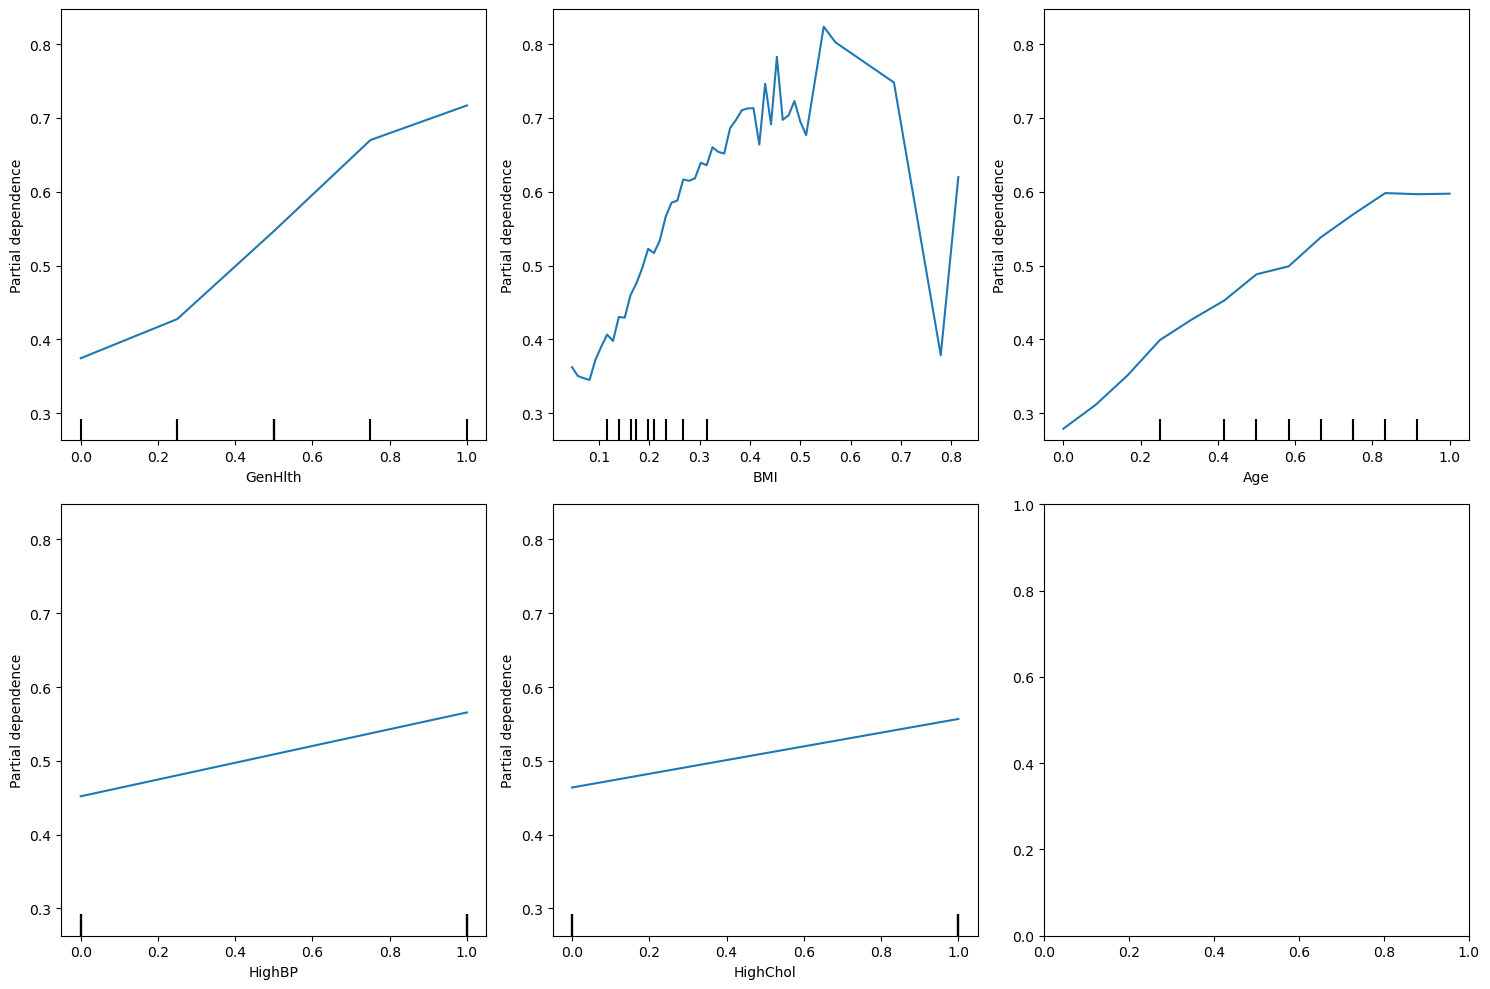

In [31]:
from sklearn.inspection import PartialDependenceDisplay

# Submuestra de 1000 observaciones
sample_X = X_test_transformed.sample(n=1000, random_state=1323)

# Seleccionar las 5 características con mayor impacto global
features = ["GenHlth", "BMI", "Age", "HighBP", "HighChol"]

# Crear el gráfico de Partial Dependence Plots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()[:5]  # Aseguramos tener 5 gráficos (uno para cada característica)

# Generar los PDP para cada característica
PartialDependenceDisplay.from_estimator(pipeline.named_steps['xgb_model'], sample_X, features, ax=ax)

# Ajuste de layout
plt.tight_layout()
plt.show()

* GenHlth: A medida que el valor de GenHlth aumenta (mejor estado de salud general), también lo hace la salida promedio del modelo, lo cual parece contrario a lo esperado (ya que normalmente un mejor estado de salud reduciría el riesgo de diabetes). Esto sugiere que la relación podría ser compleja y posiblemente esté influenciada por interacciones con otras características.

* BMI: Existe una clara relación positiva entre BMI y la salida del modelo. A medida que el índice de masa corporal aumenta, la probabilidad de diabetes se incrementa de manera consistente hasta cierto punto, donde luego muestra una caída abrupta. Esto respalda que un alto BMI es un factor de riesgo importante, aunque la caída al final sugiere posibles valores atípicos o efectos no lineales que podrían requerir una exploración adicional.

* Age: La probabilidad de diabetes aumenta gradualmente con la edad, lo cual es consistente con el riesgo creciente de diabetes en personas mayores. Esto sugiere que Age es un predictor positivo de diabetes, con un aumento claro y sostenido en la salida del modelo.

* HighBP: La relación entre HighBP (hipertensión) y la salida del modelo es ligeramente positiva, lo que implica que tener presión arterial alta aumenta la probabilidad de diabetes, aunque el efecto es menos marcado comparado con BMI y Age.

* HighChol: También muestra una relación positiva, aunque leve, con la salida del modelo, indicando que el colesterol alto incrementa ligeramente la probabilidad de diabetes.

En general, estas conclusiones parecen reflejar patrones comunes en el conjunto de datos, especialmente para características como BMI y Age, que muestran relaciones claras y consistentes con la salida del modelo. Sin embargo, algunos comportamientos no lineales (como la caída al final del PDP de BMI) y la relación inesperada en GenHlth sugieren que puede haber interacciones con otras características o efectos específicos de subgrupos.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. 
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`. 

In [18]:
from alibi.explainers import AnchorTabular

In [19]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>